In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


import tensorflow as tf 
import os 
import config
from utils.postprocessing.representation import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

We are on PC


## Model configuration - Loading

In [3]:
# from models import Adapt

## Here we plot the windows and bases of the Adapt model
####
#### MODEL CONFIG
####

config_model = {}
config_model["type"] = "pretraining"
config_model["batch_size"] = 16
config_model["chunk_size"] = 512*40
config_model["N"] = 256
config_model["maxpool"] = 256
config_model["window"] = 1024
config_model["smooth_size"] = 10
config_model["alpha"] = 0.01
config_model["reg"] = 1e-3
config_model["beta"] = 0.05
config_model["rho"] = 0.01
config_model["same_filter"] = True
config_model["optimizer"] = 'Adam'

config_id = ''.join('-{}={}-'.format(key, val) for key, val in sorted(config_model.items()))
full_id = "AdaptiveNet-noisy-breeze-3898" + config_id
model_meta_path = os.path.join(config.log_dir, config_model["type"], full_id, 'model.ckpt.meta')
model_path = os.path.join(config.log_dir, config_model["type"], full_id, 'model.ckpt')

# Getting desired Tensors - Bases and Windows

In [4]:
sess = tf.Session()

importer = tf.train.import_meta_graph(model_meta_path)
importer.restore(sess, model_path)

graph = tf.get_default_graph()

window_front = graph.get_tensor_by_name('front/window/w:0')
bases_front = graph.get_tensor_by_name('front/bases/bases:0')

window_back = graph.get_tensor_by_name('back/window_2/w_2:0')
bases_back = graph.get_tensor_by_name('back/bases_2/bases_2:0')


with sess.as_default():
	window_front = window_front.eval()
	bases_front = np.transpose(bases_front.eval())
	window_back = window_back.eval()
	bases_back = np.transpose(bases_back.eval())

hanning = np.hanning(config_model['window'])
hamming = np.hamming(config_model['window'])

INFO:tensorflow:Restoring parameters from /home/anthony/das/log/pretraining/AdaptiveNet-noisy-breeze-3898-N=256--alpha=0.01--batch_size=16--beta=0.05--chunk_size=20480--maxpool=256--optimizer=Adam--reg=0.001--rho=0.01--same_filter=True--smooth_size=10--type=pretraining--window=1024-/model.ckpt


# Front

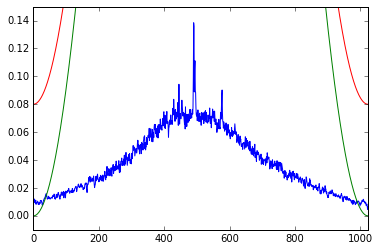

(256, 1024)


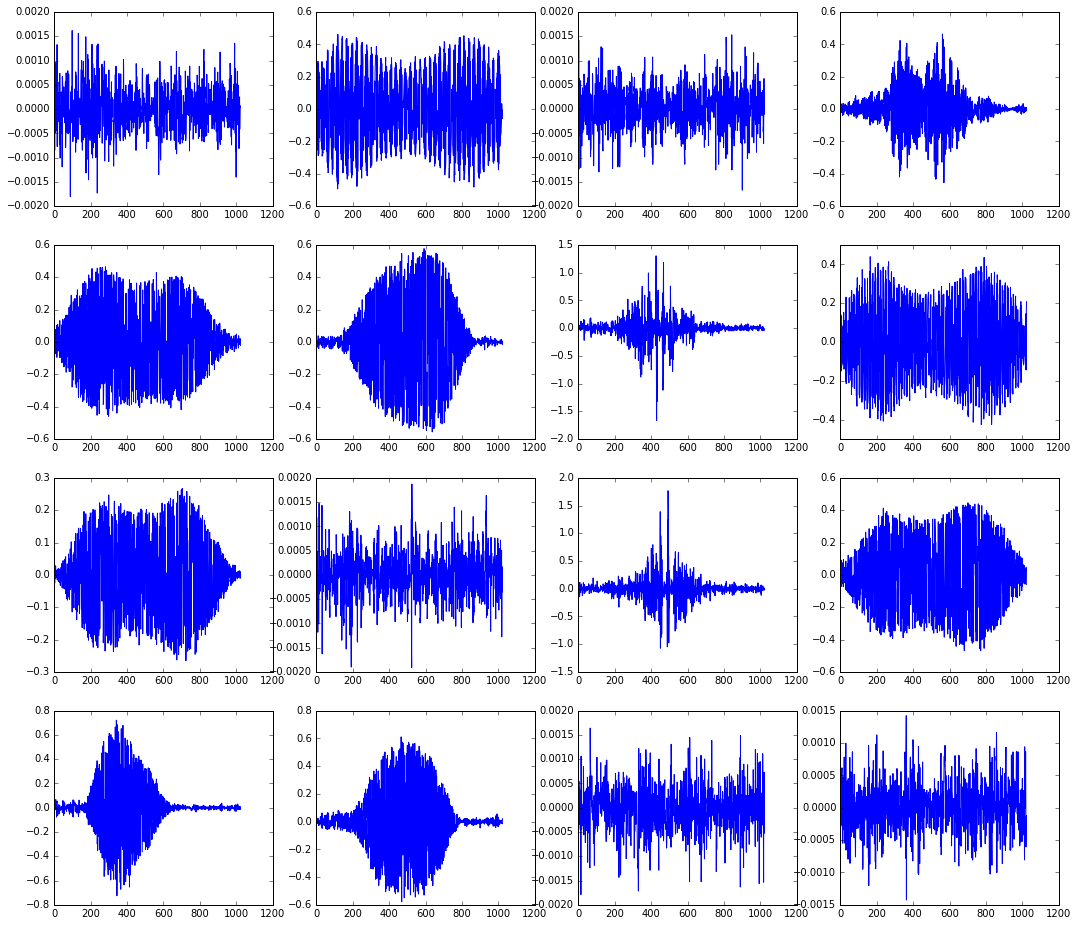

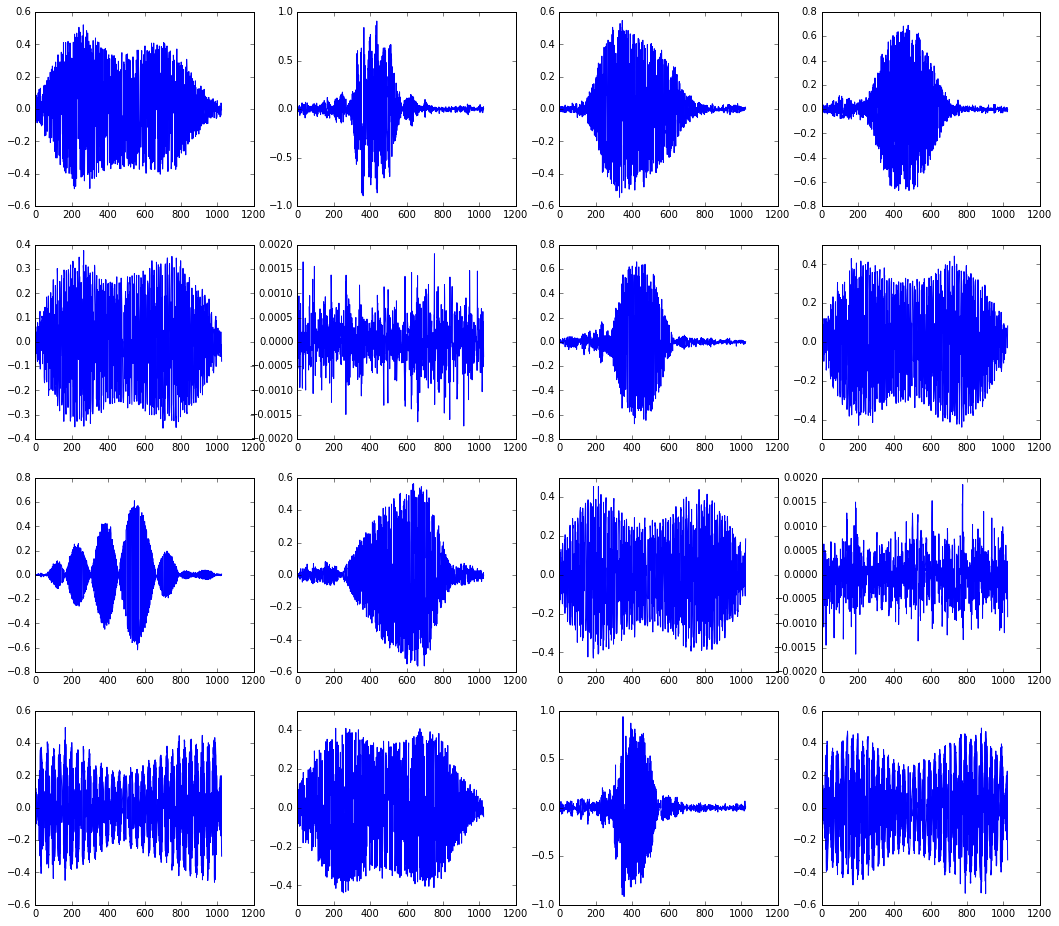

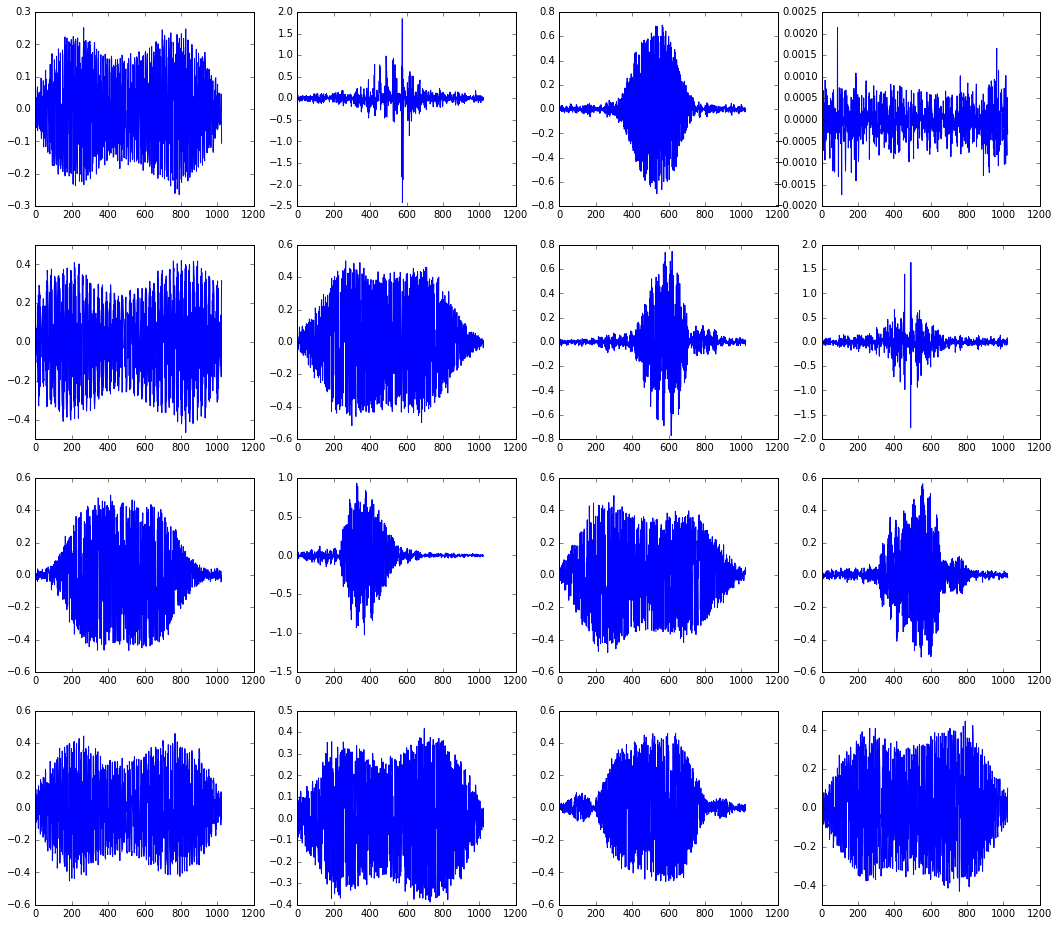

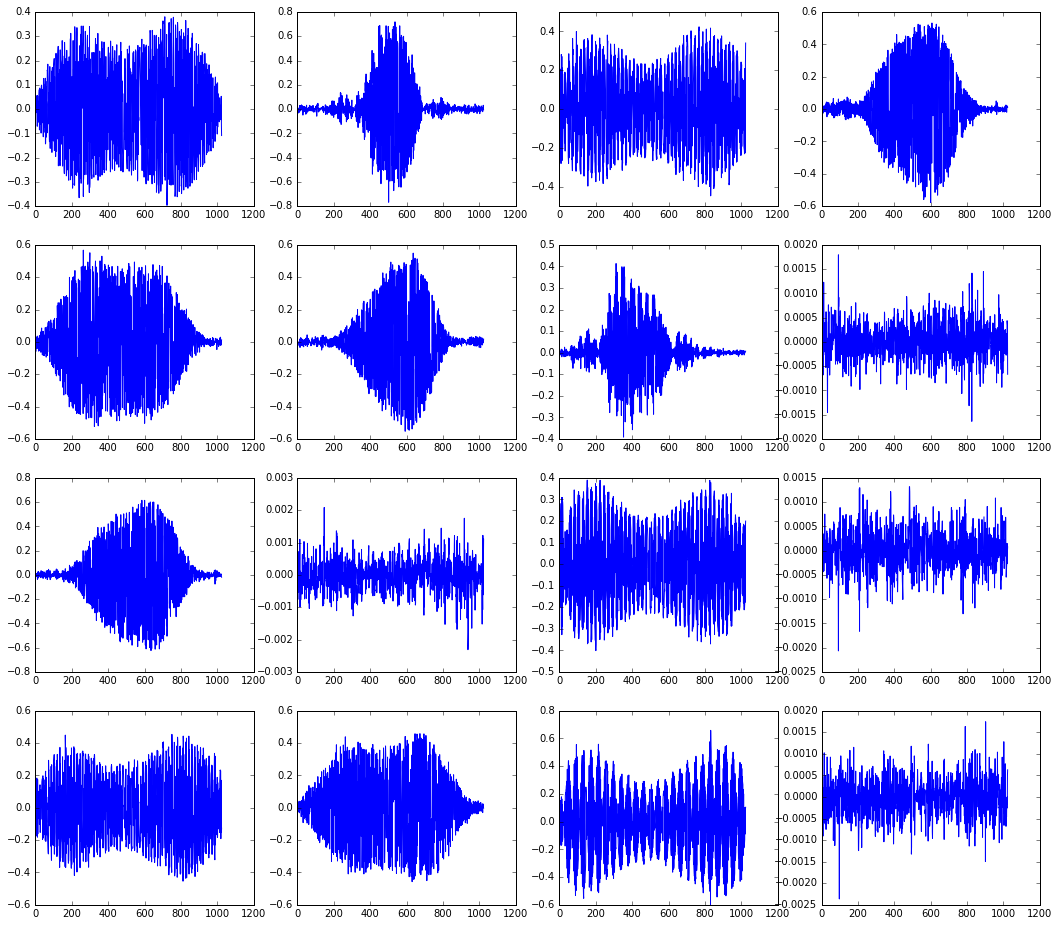

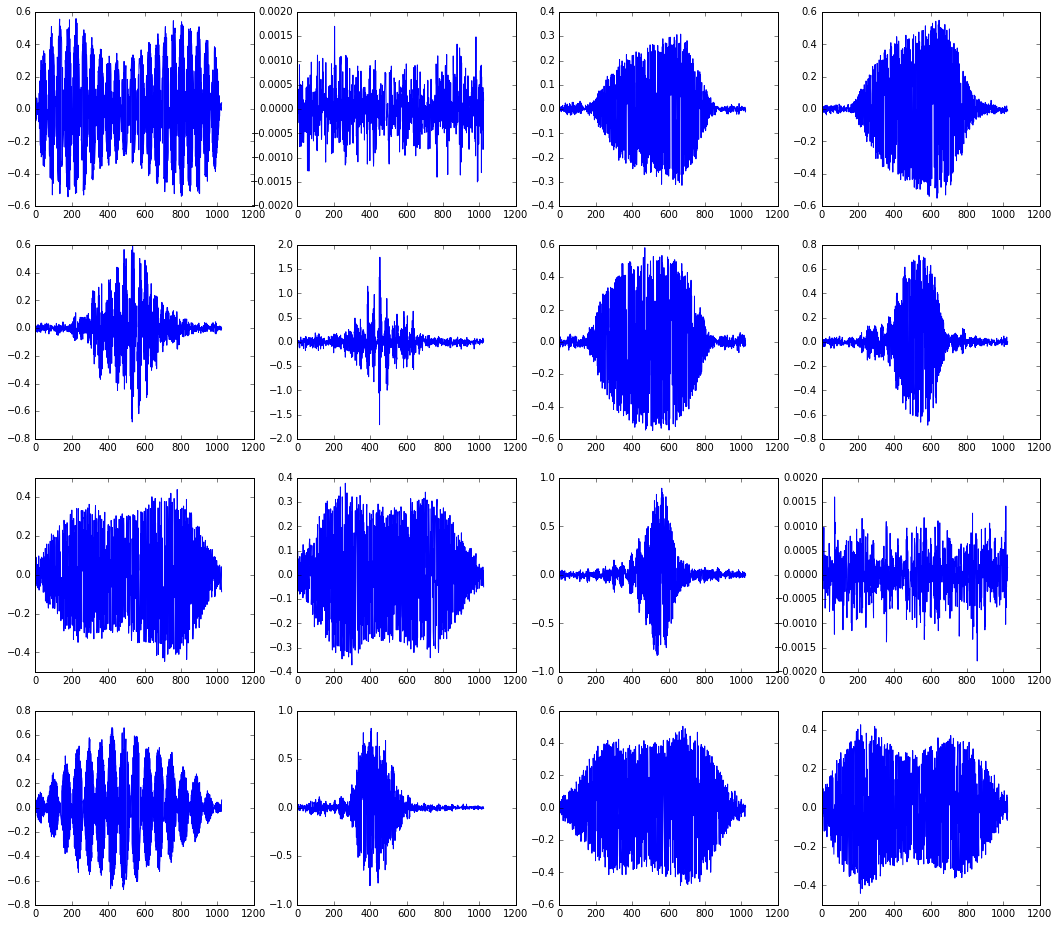

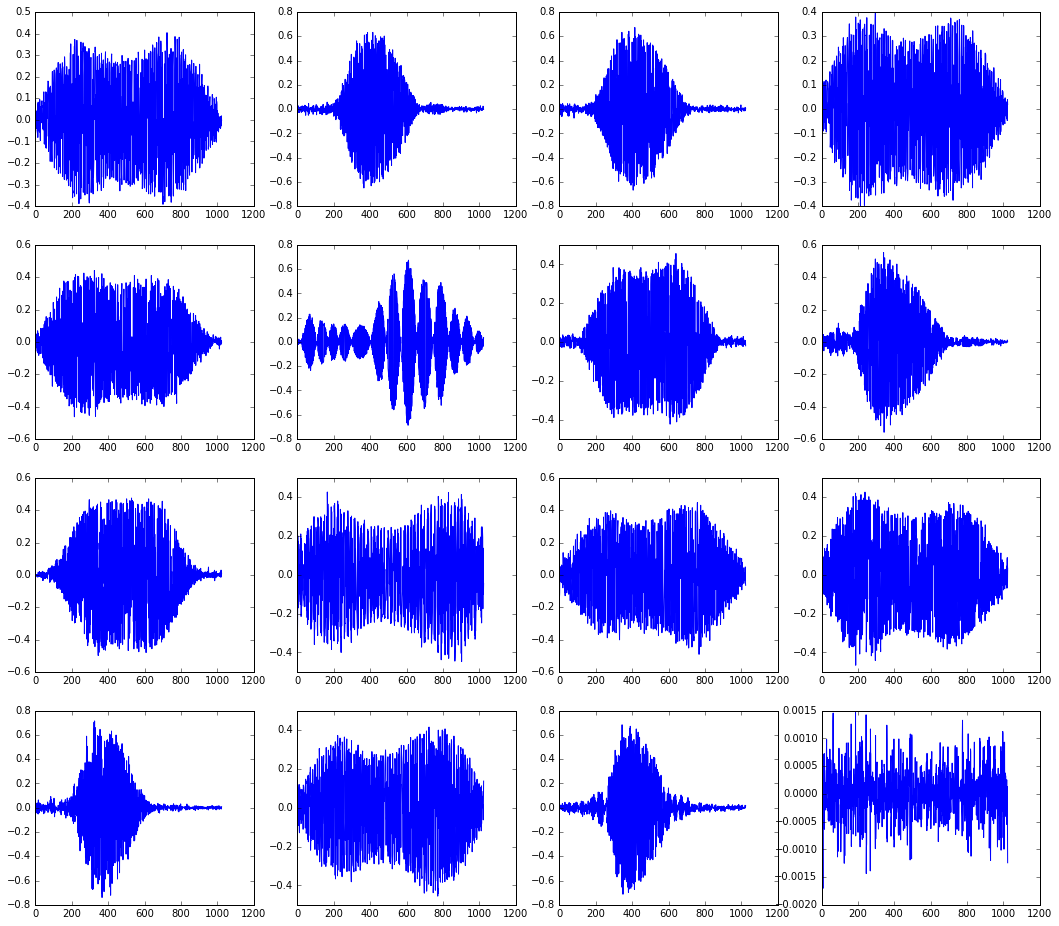

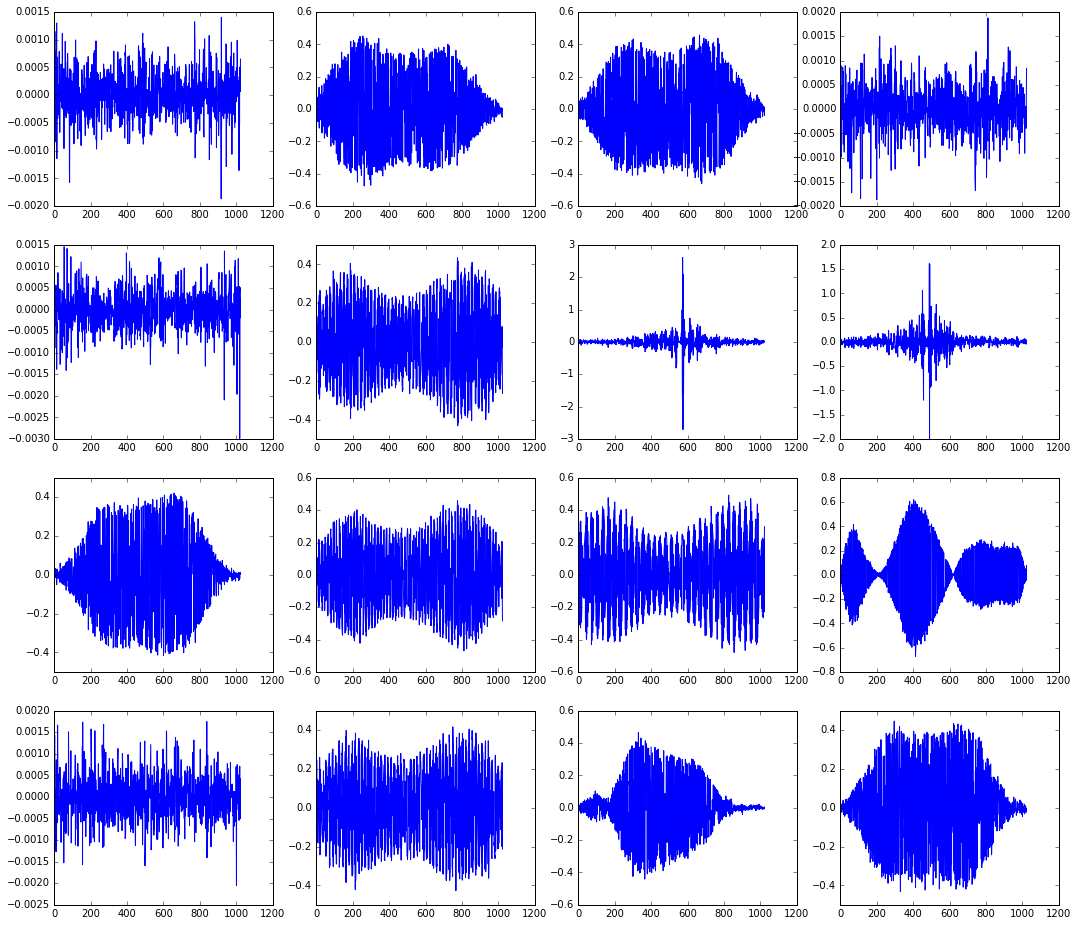

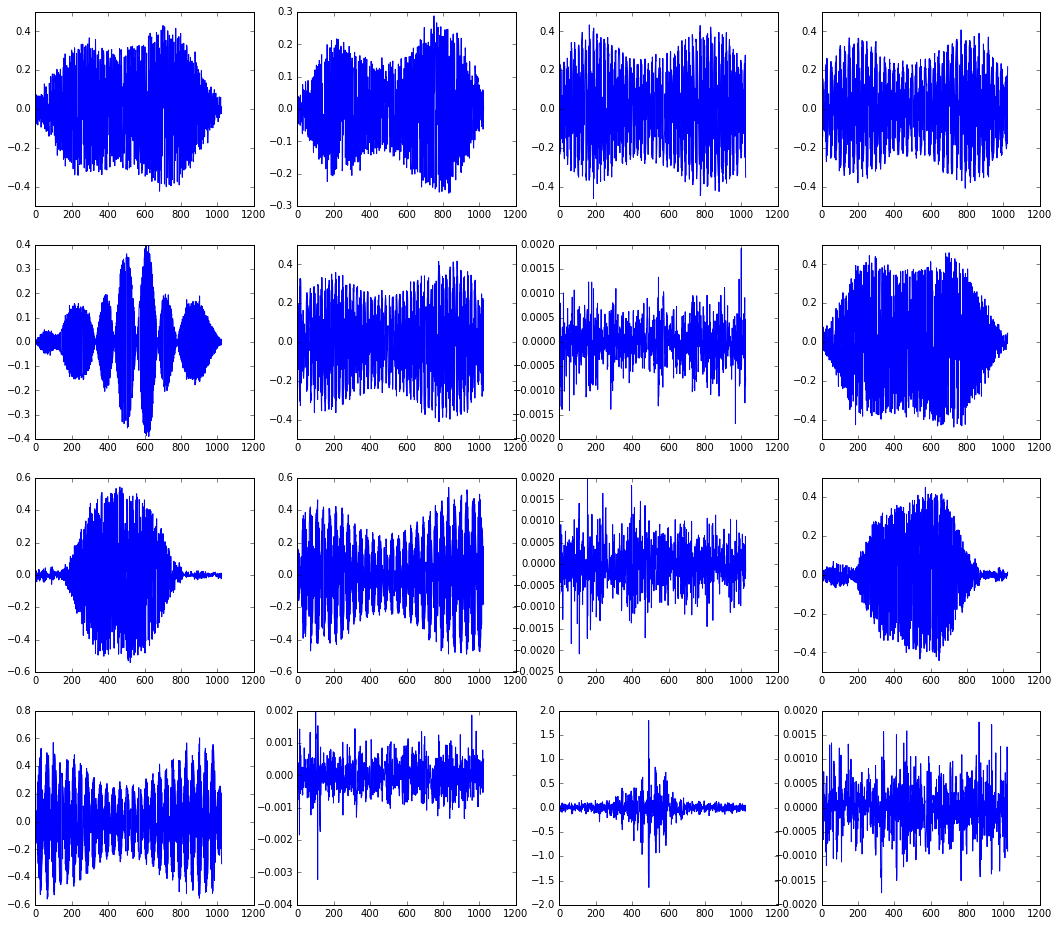

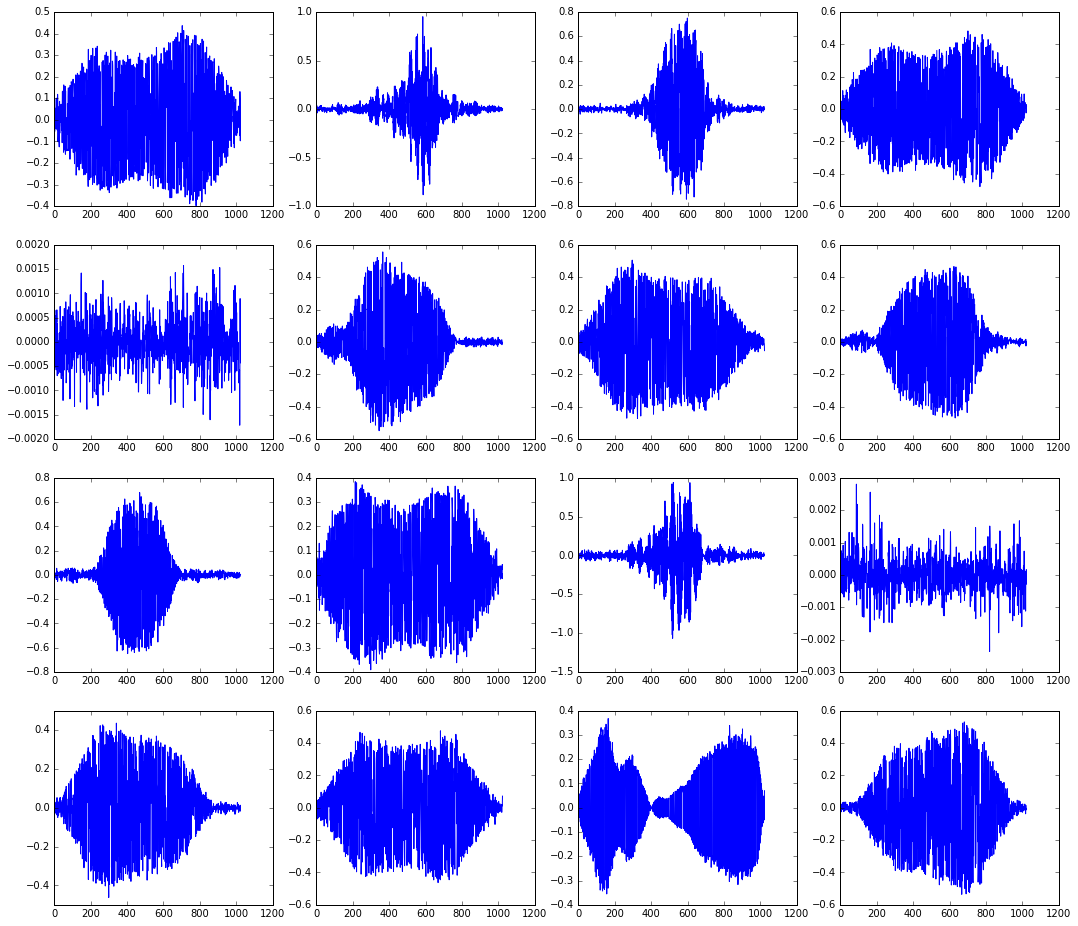

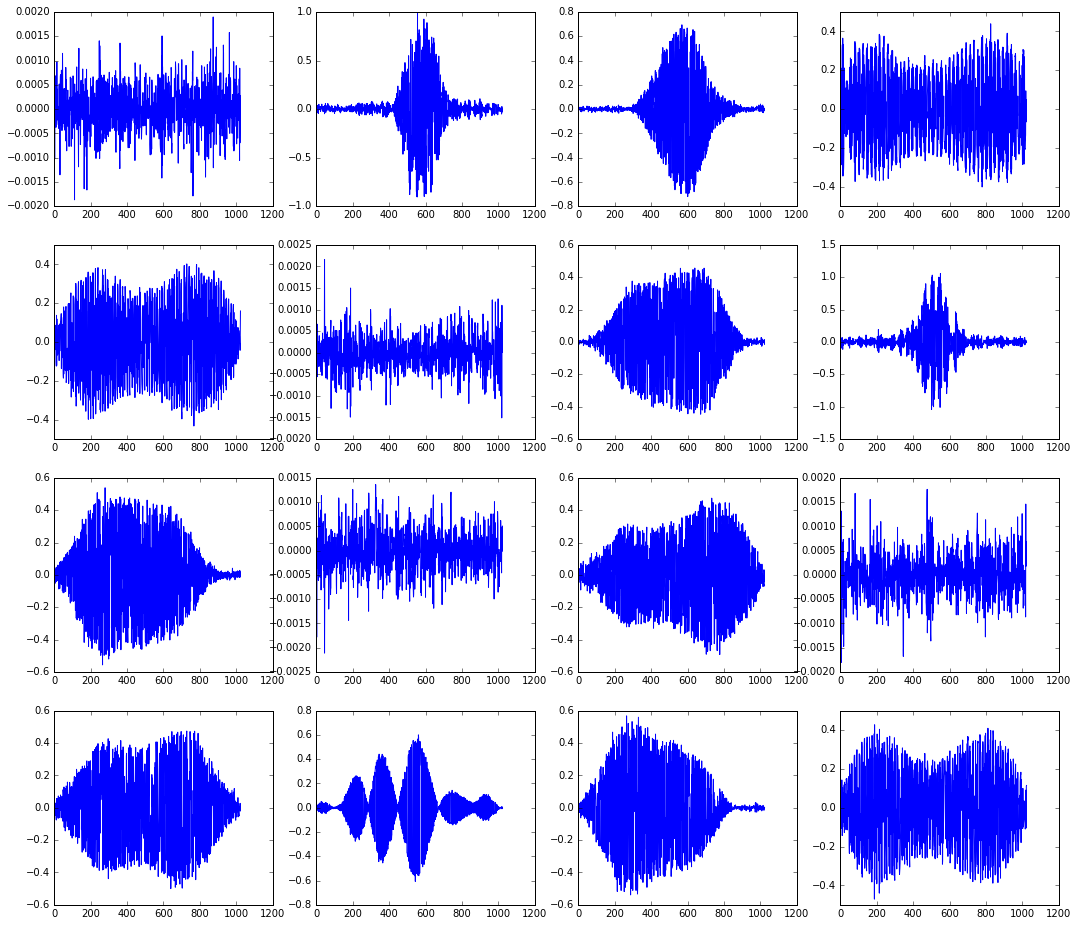

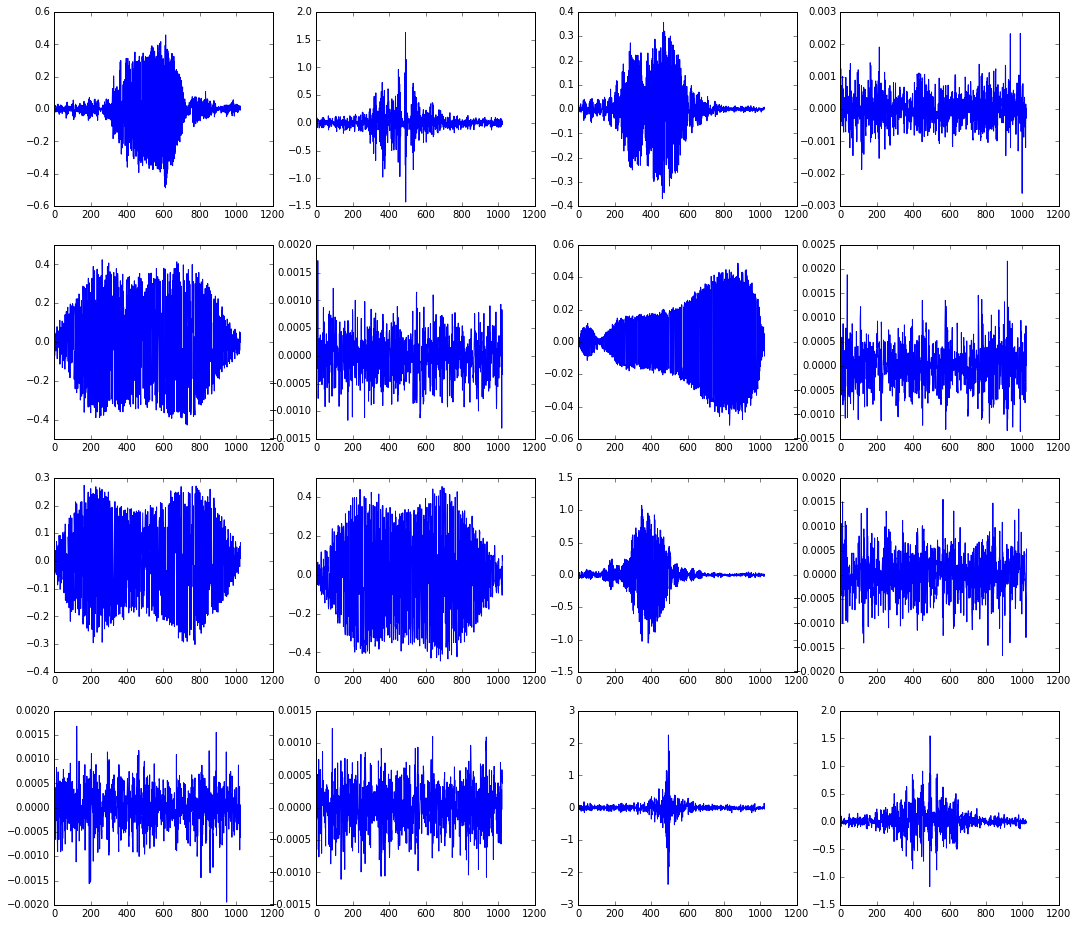

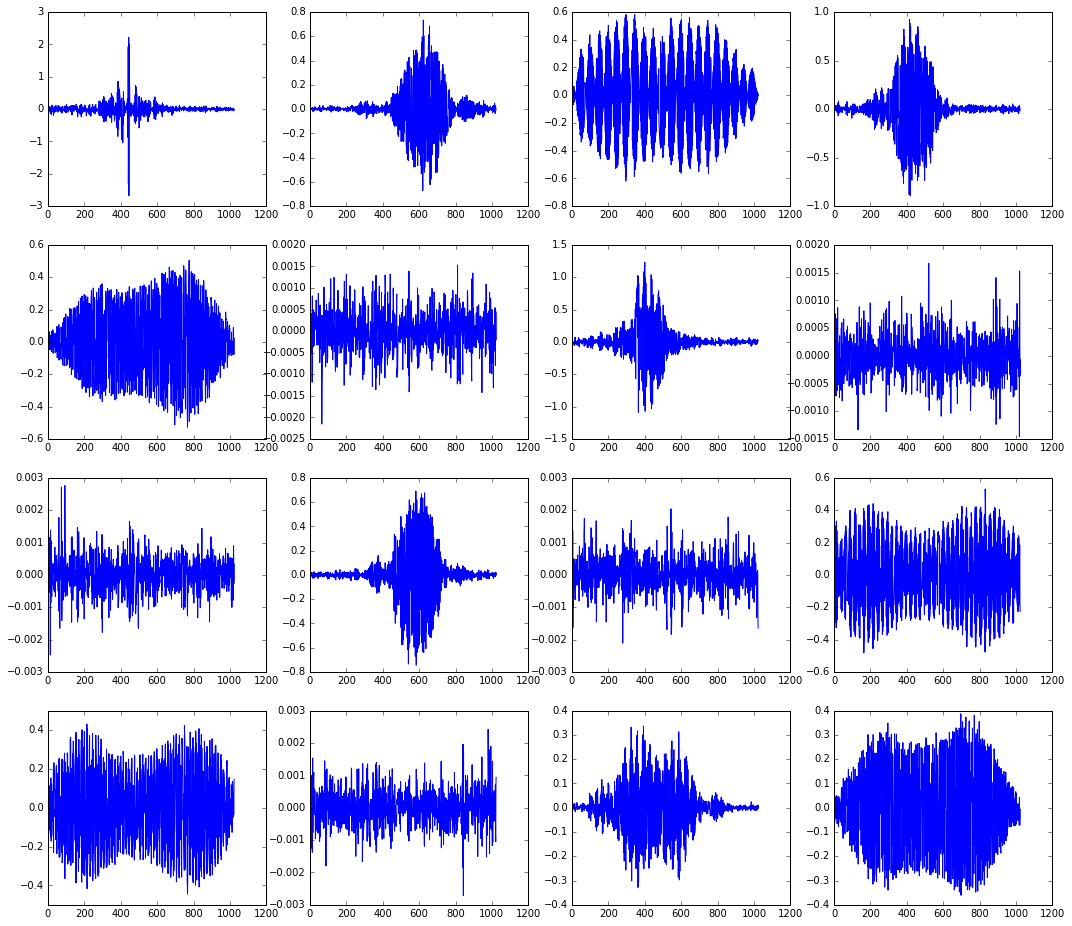

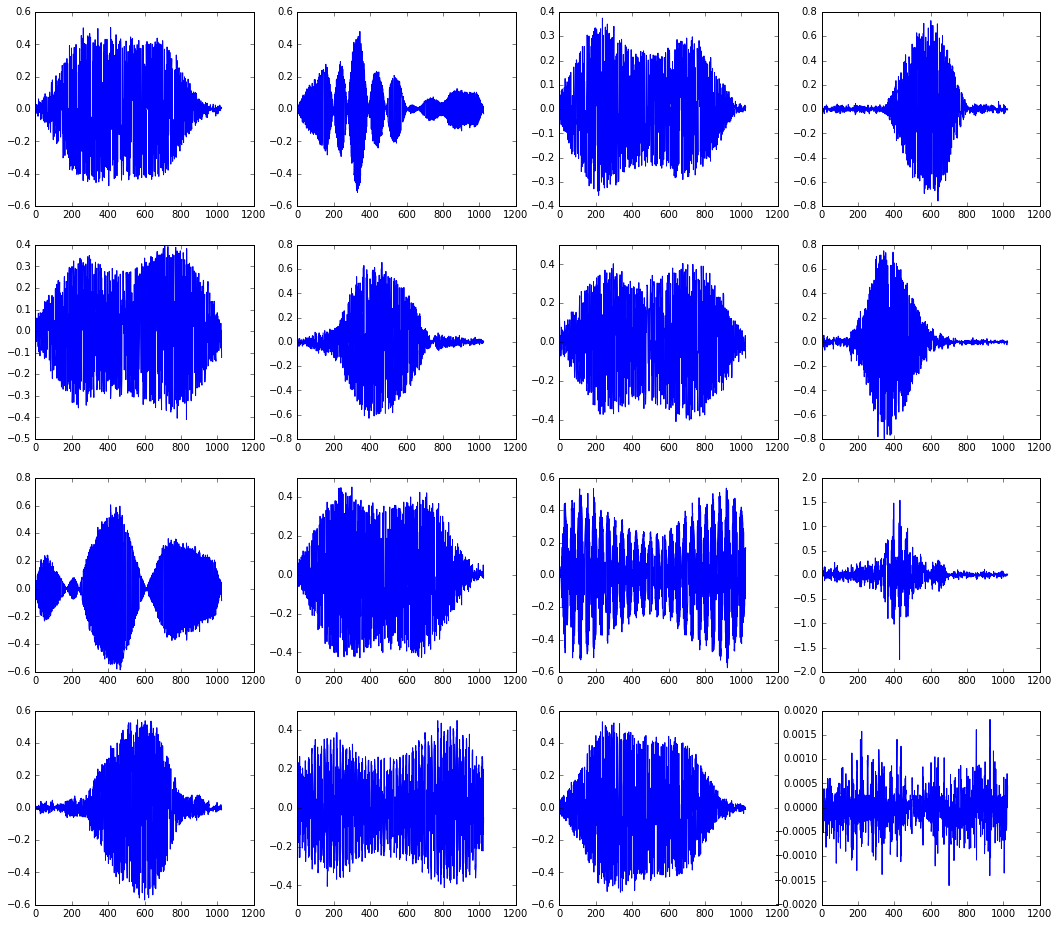

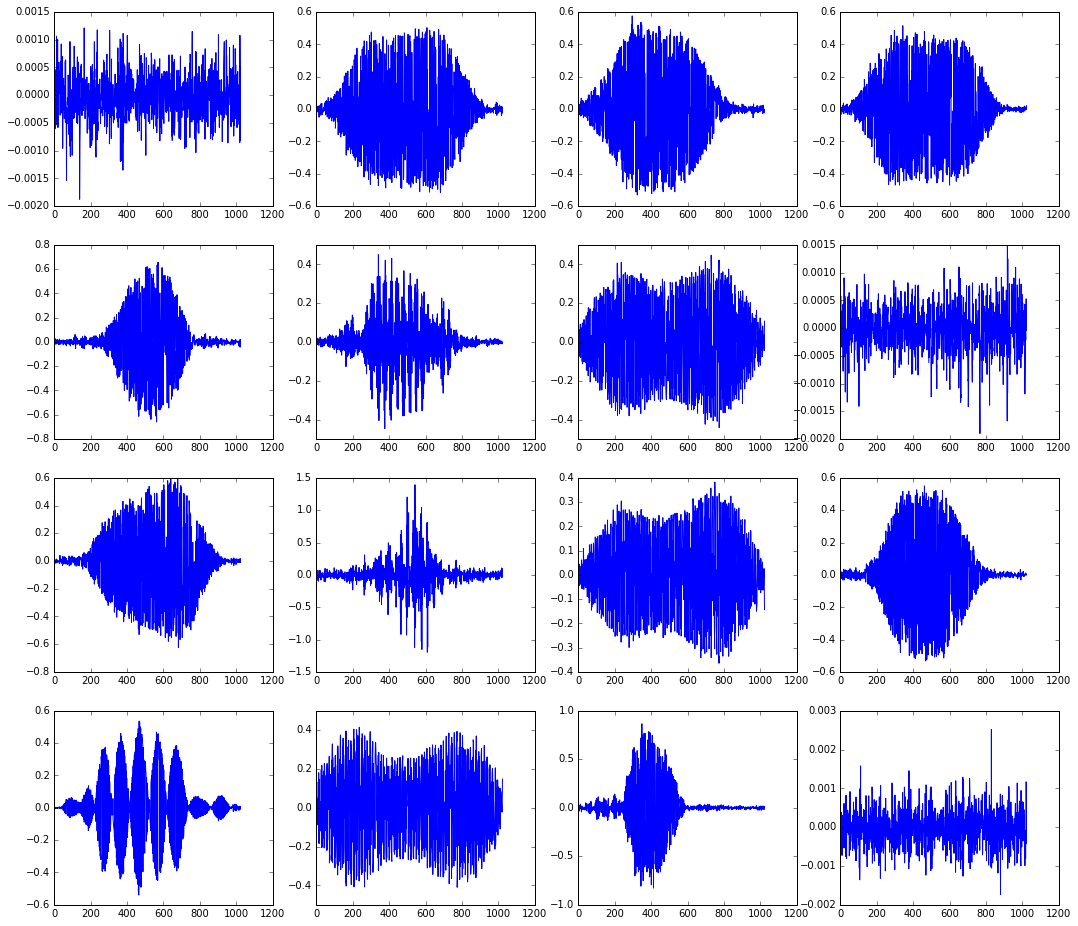

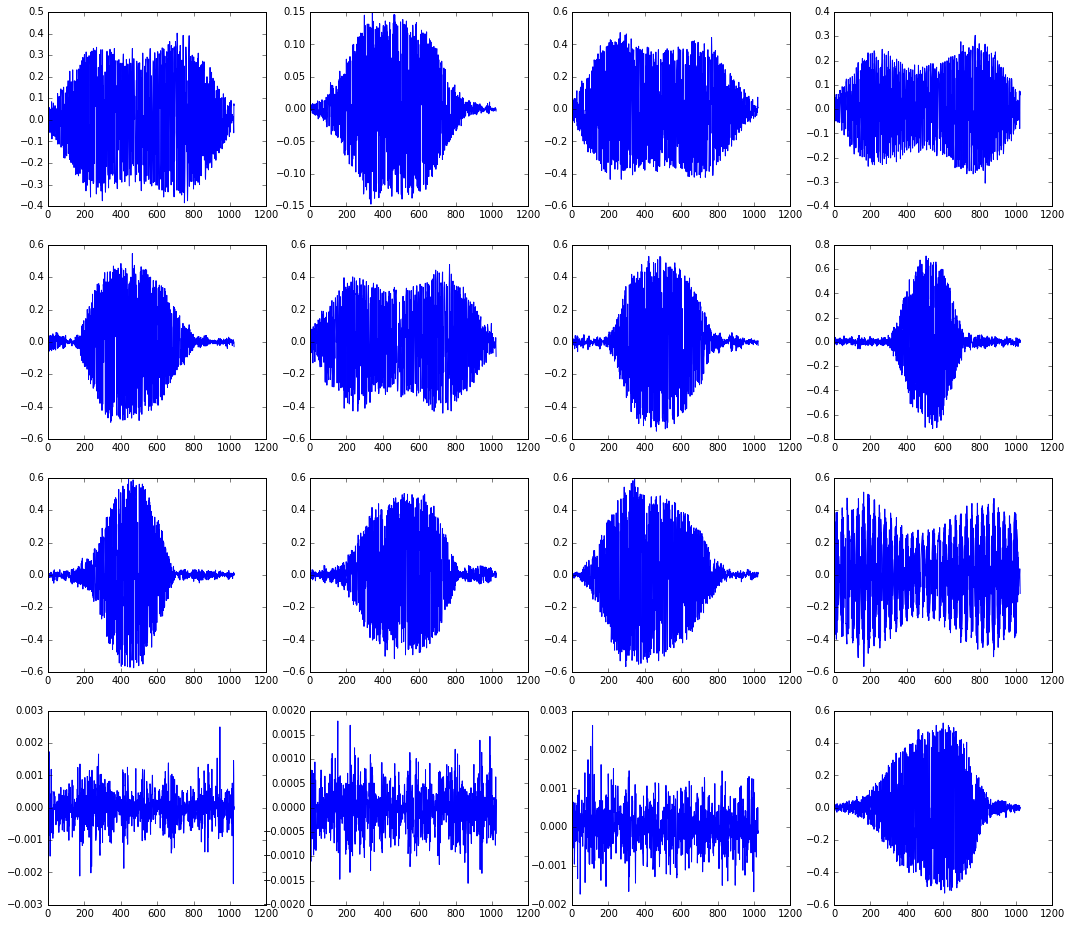

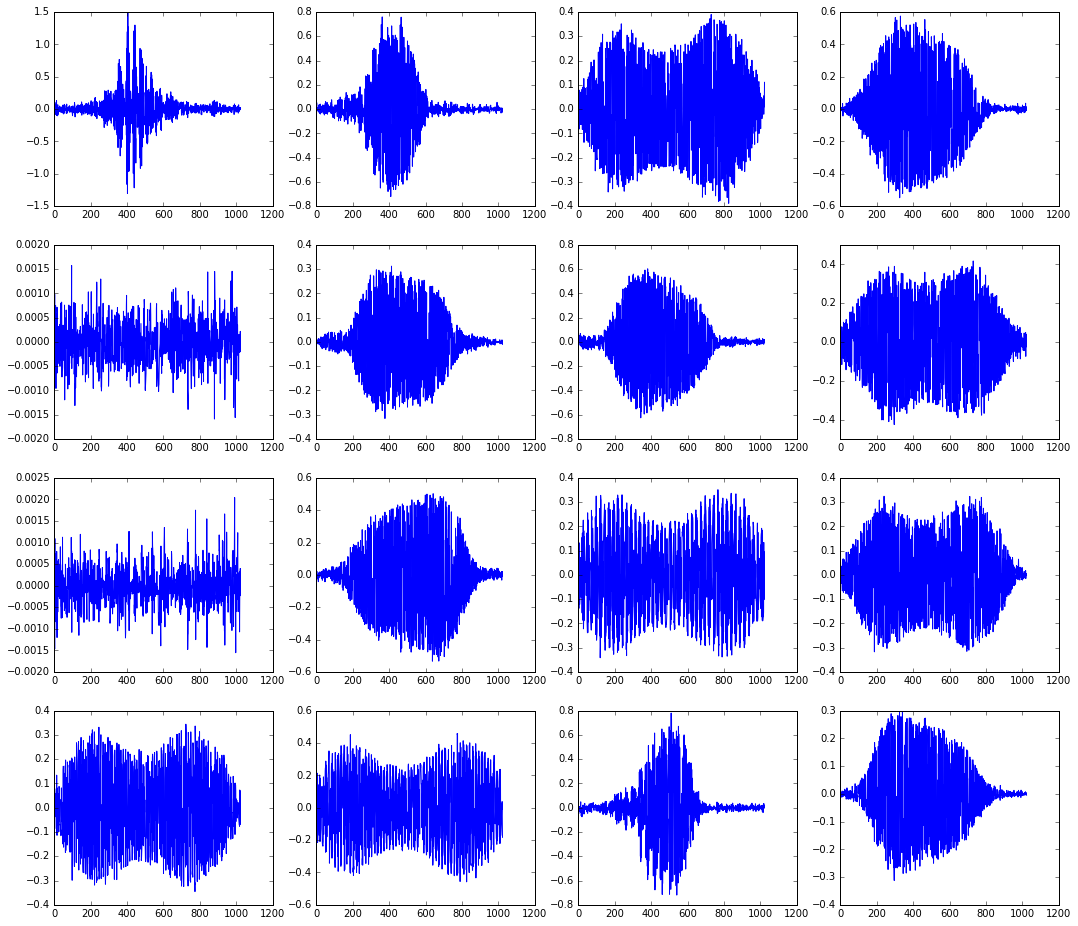

In [14]:

plt.plot(np.abs(window_front), label='front window')
plt.plot(np.abs(hanning), label='hanning window')
plt.plot(np.abs(hamming), label='hanning window')
plt.axis([0, 1024,-0.01,0.15])
plt.show()

print bases_front.shape

tot = 100

256

for j in range(16):
    fig, plots = plt.subplots(4, 4, figsize=(18, 16))
    for x in range(4):
        for y in range(4):
            plots[x, y].plot(bases_front[j*16+(4*y+x)])
    plt.show()


# Back

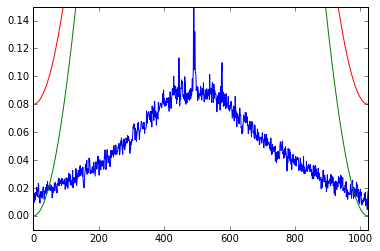

(256, 1024)


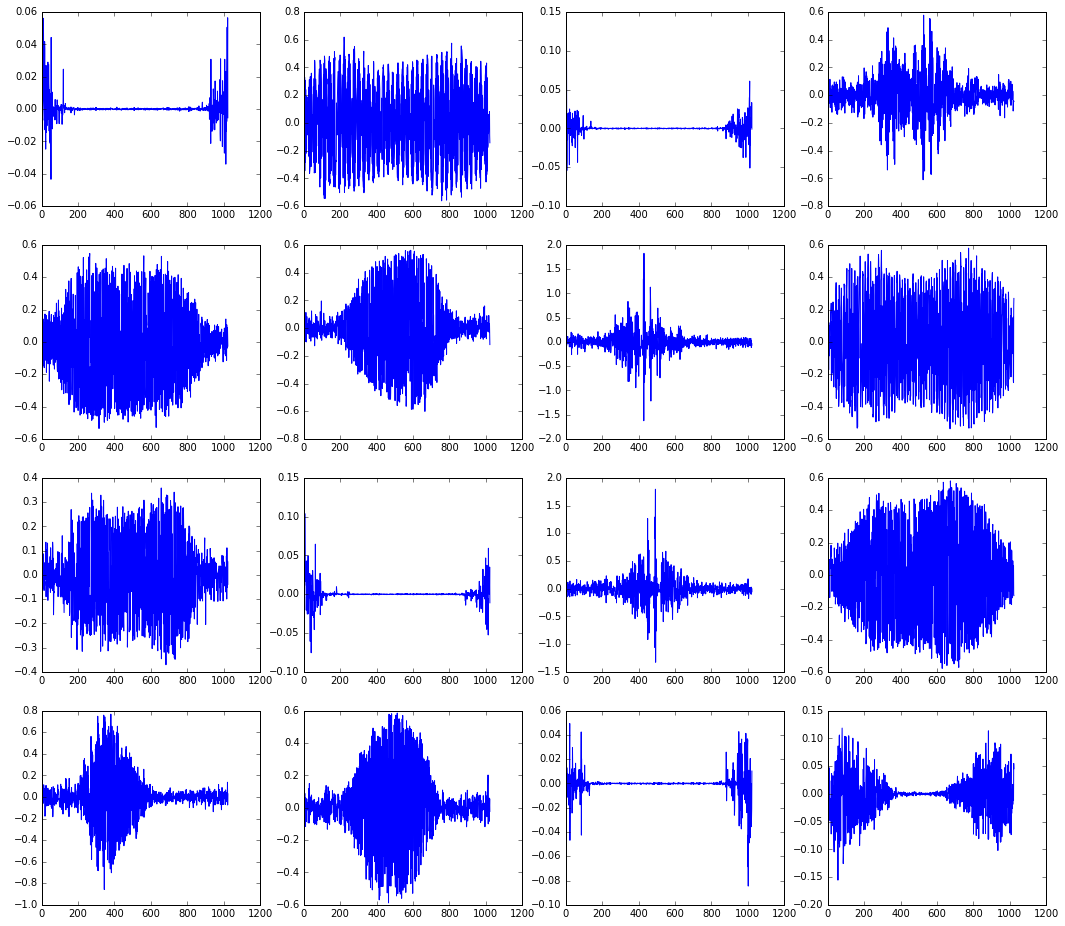

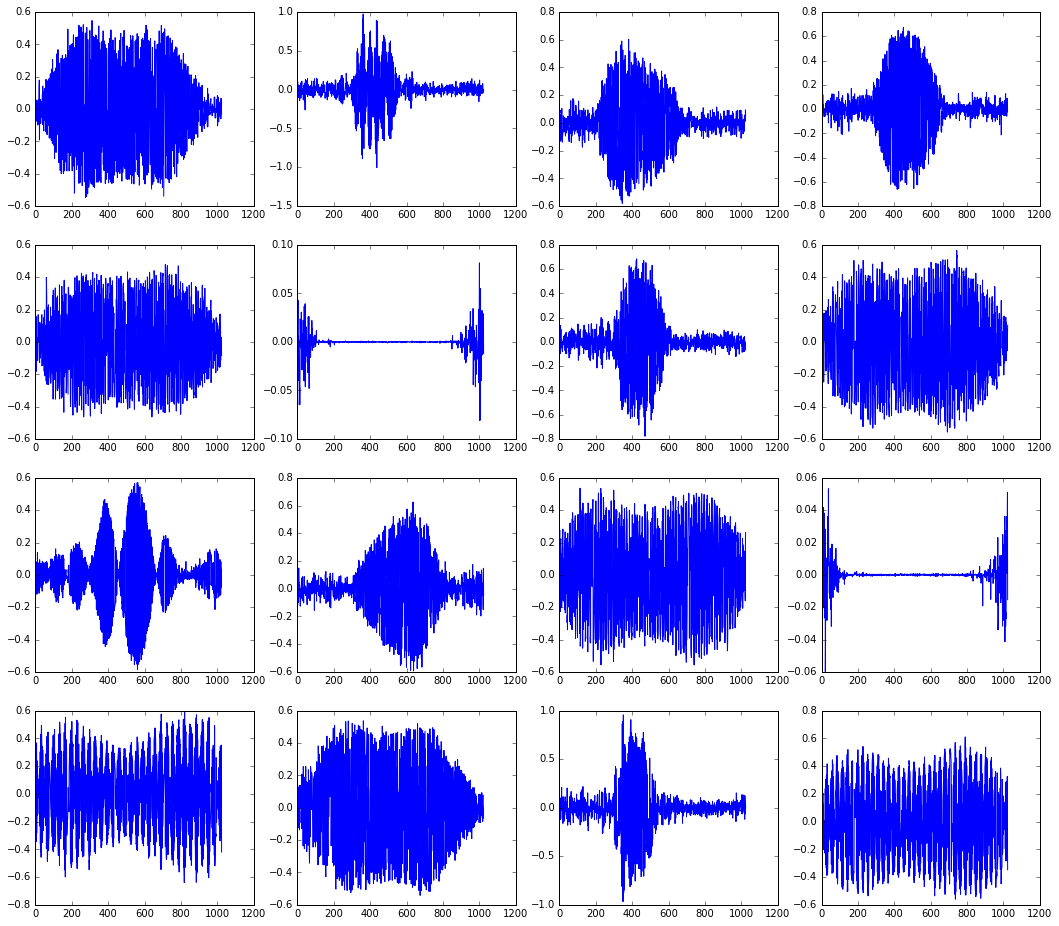

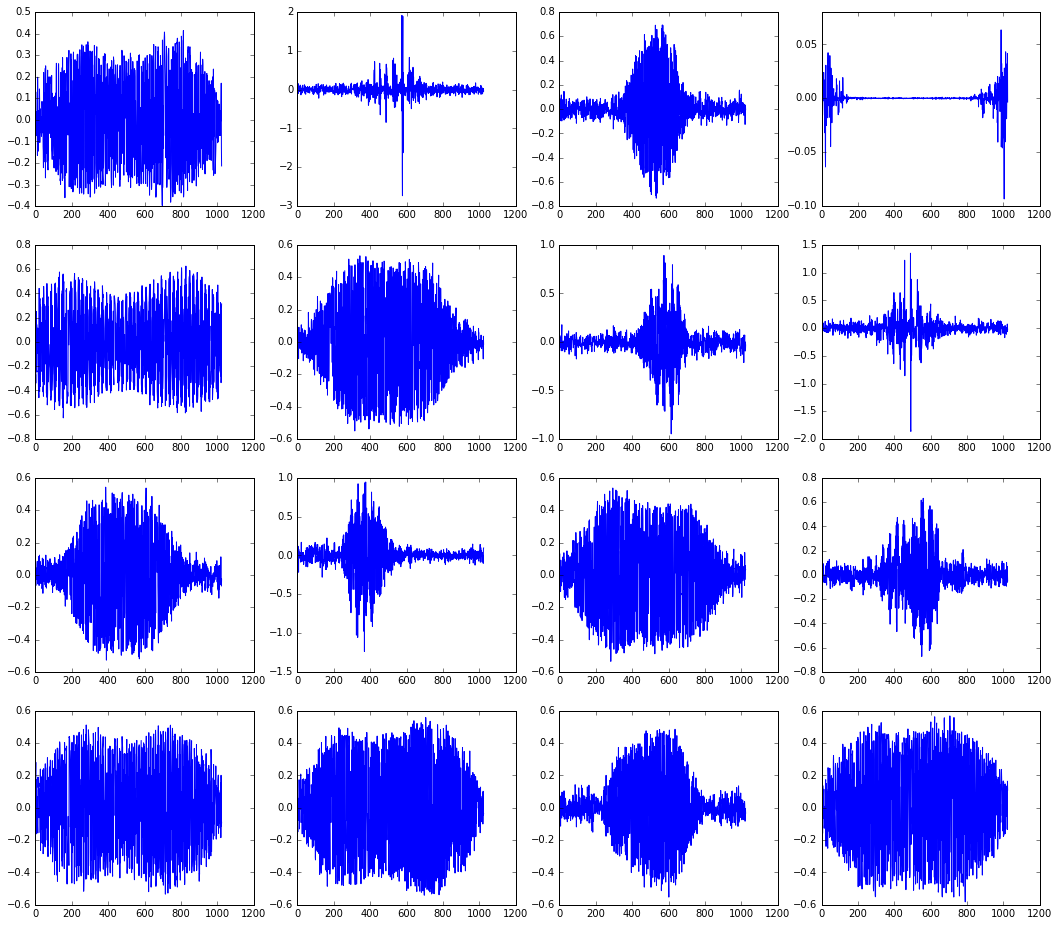

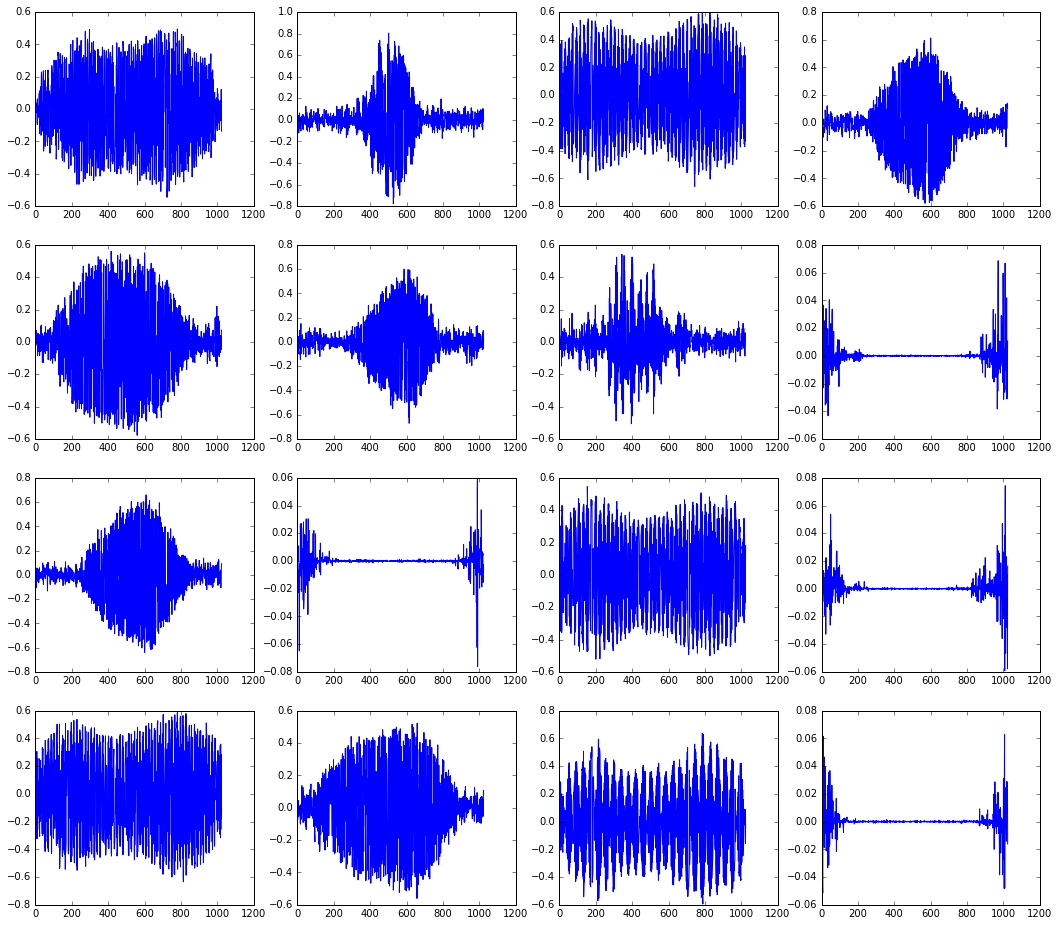

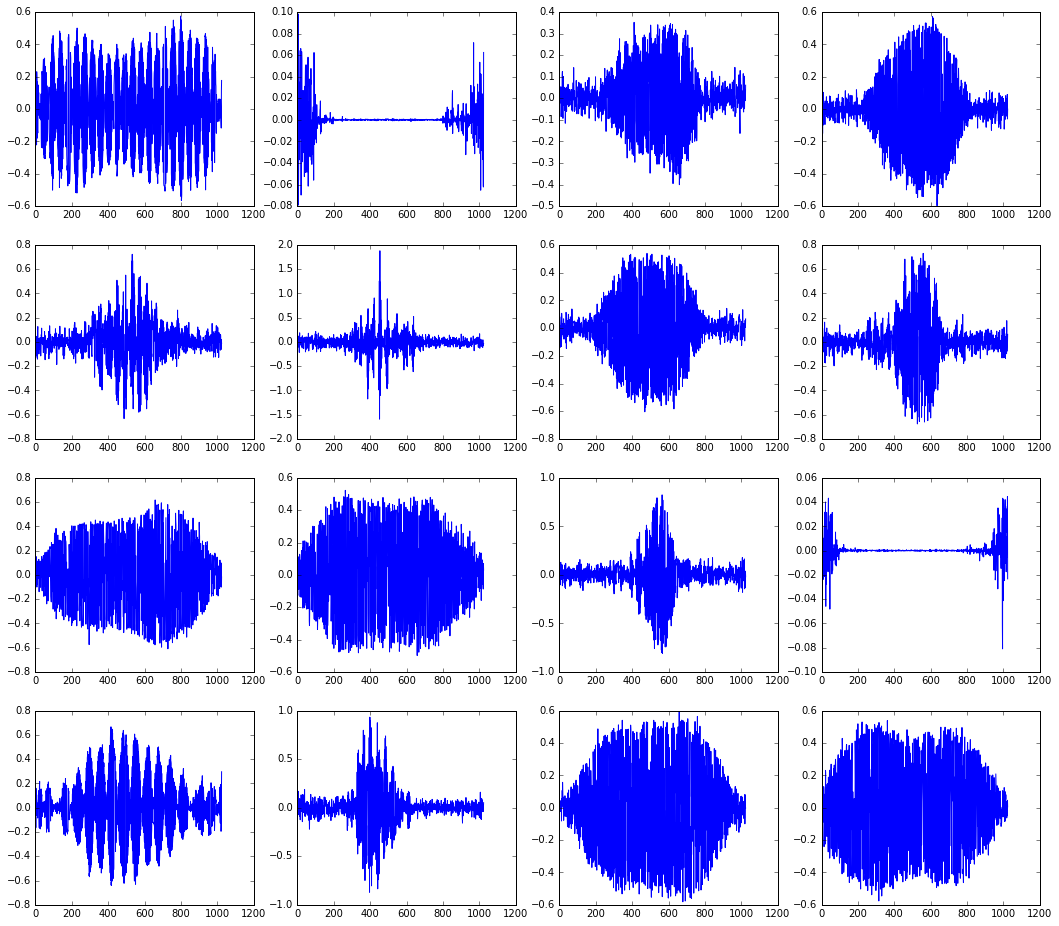

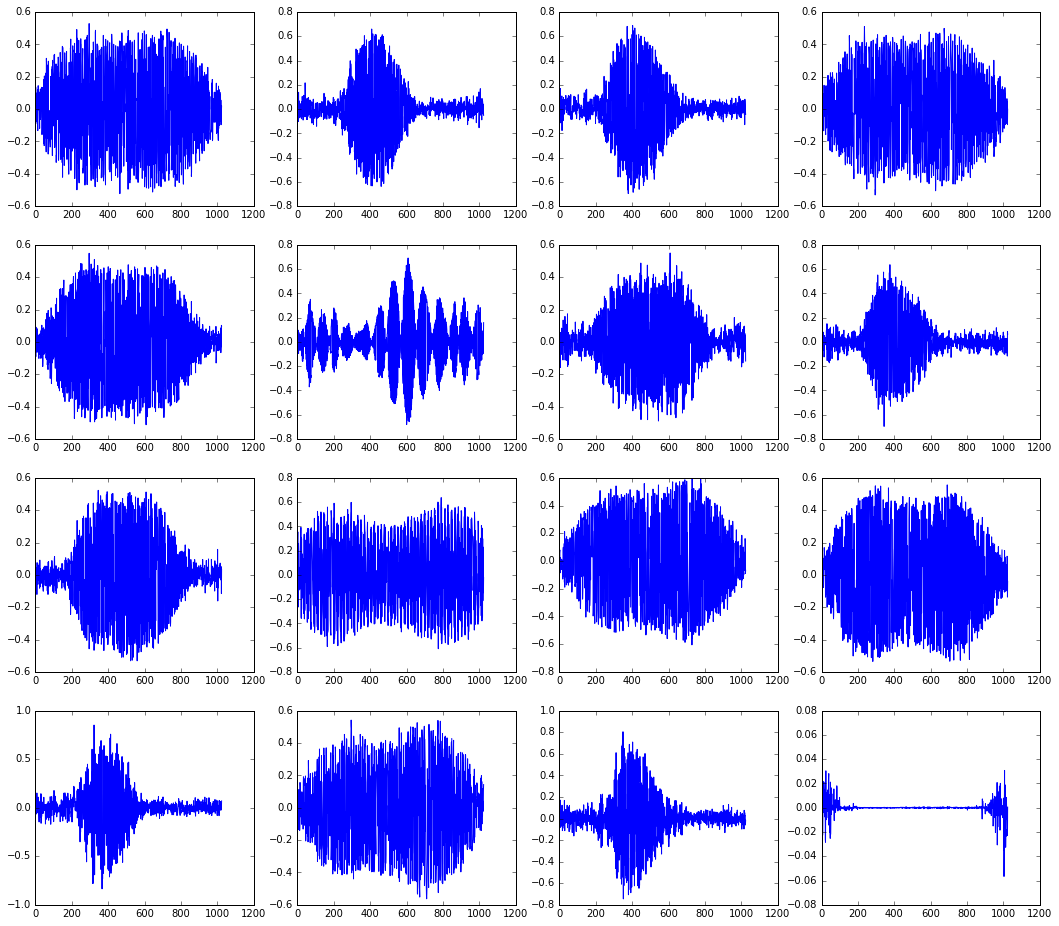

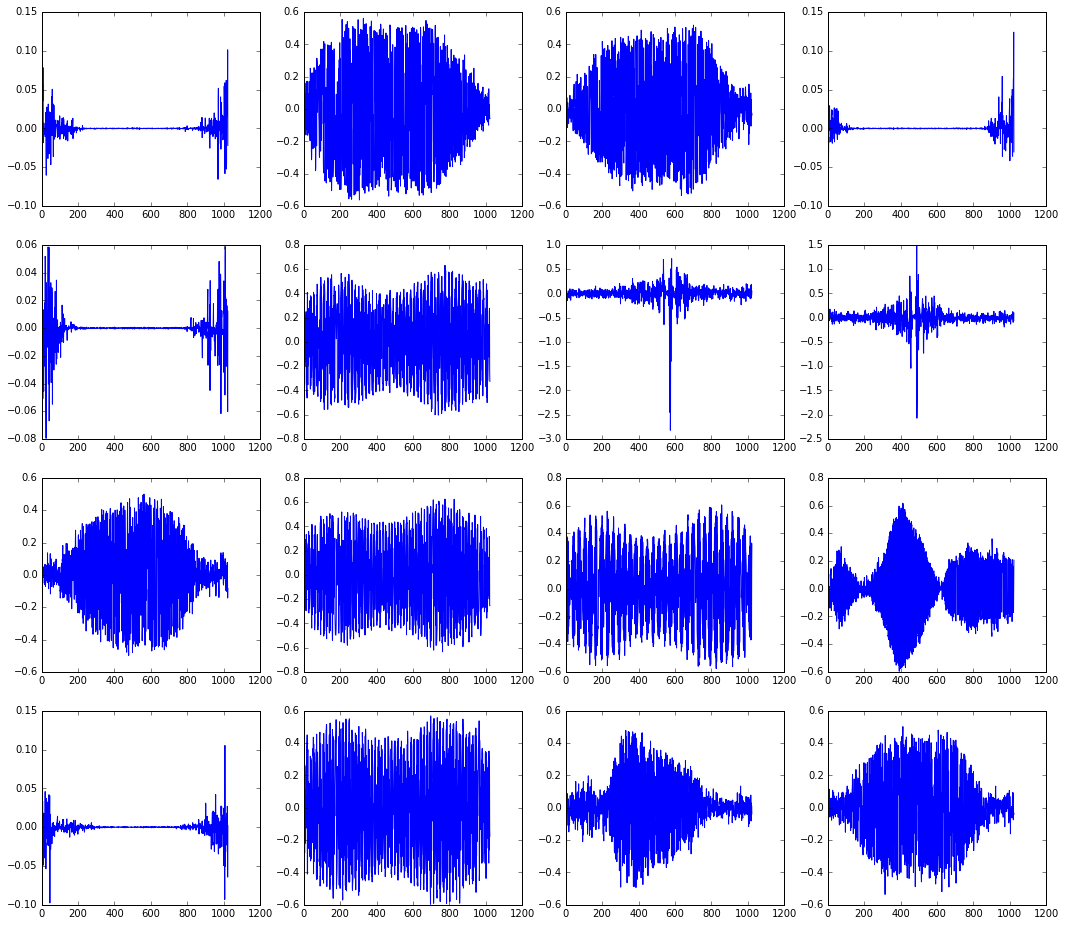

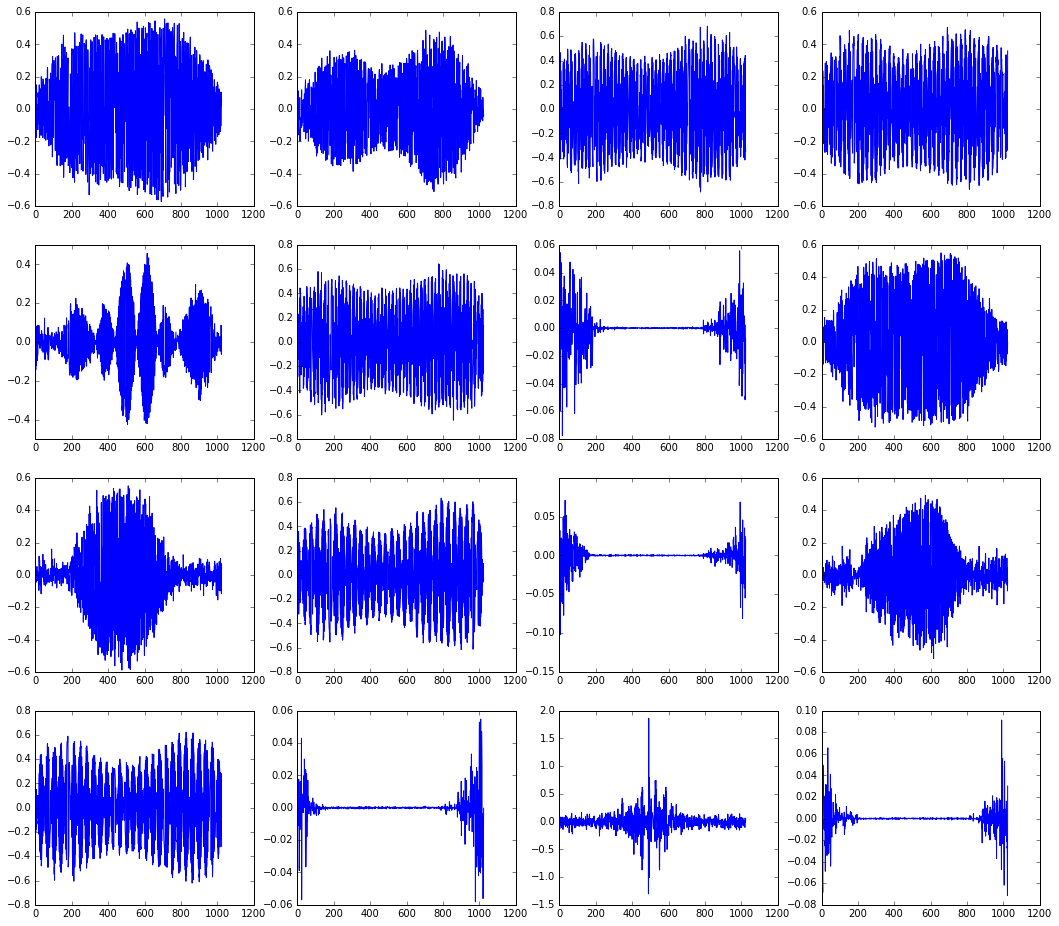

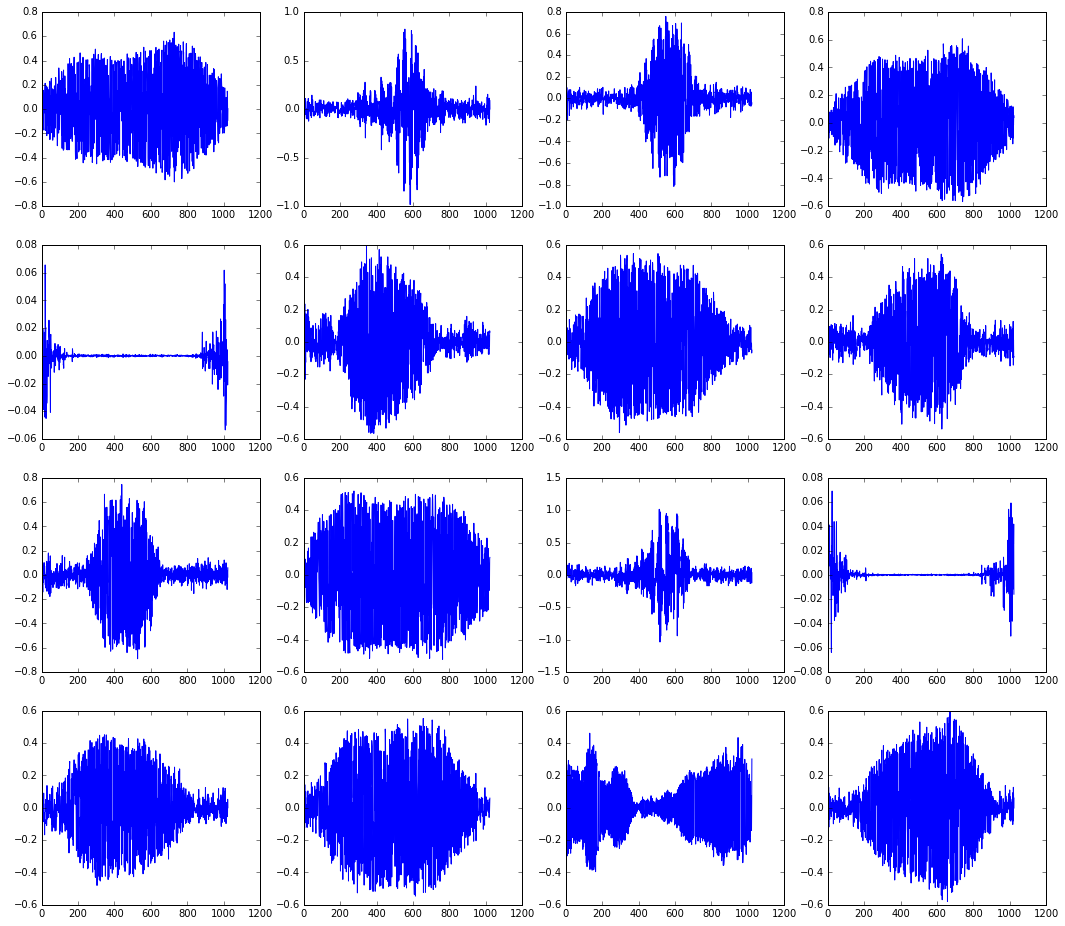

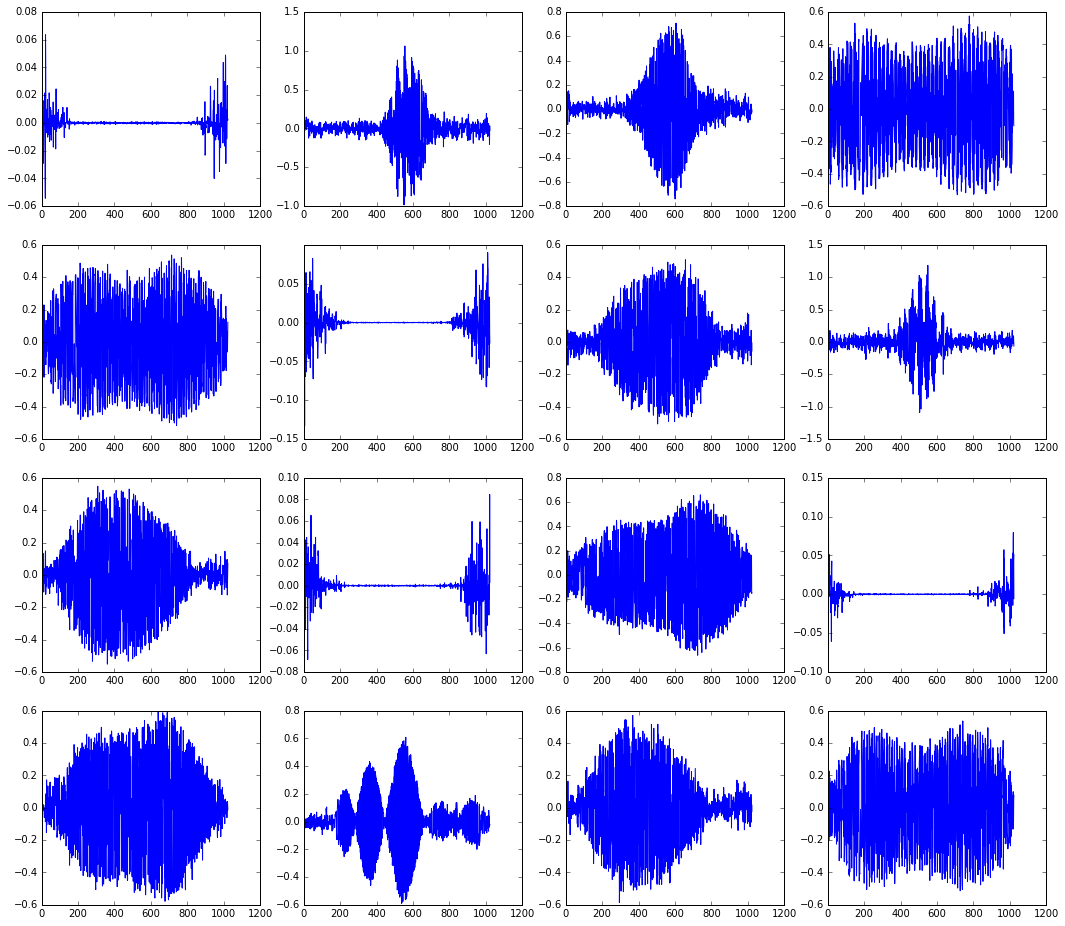

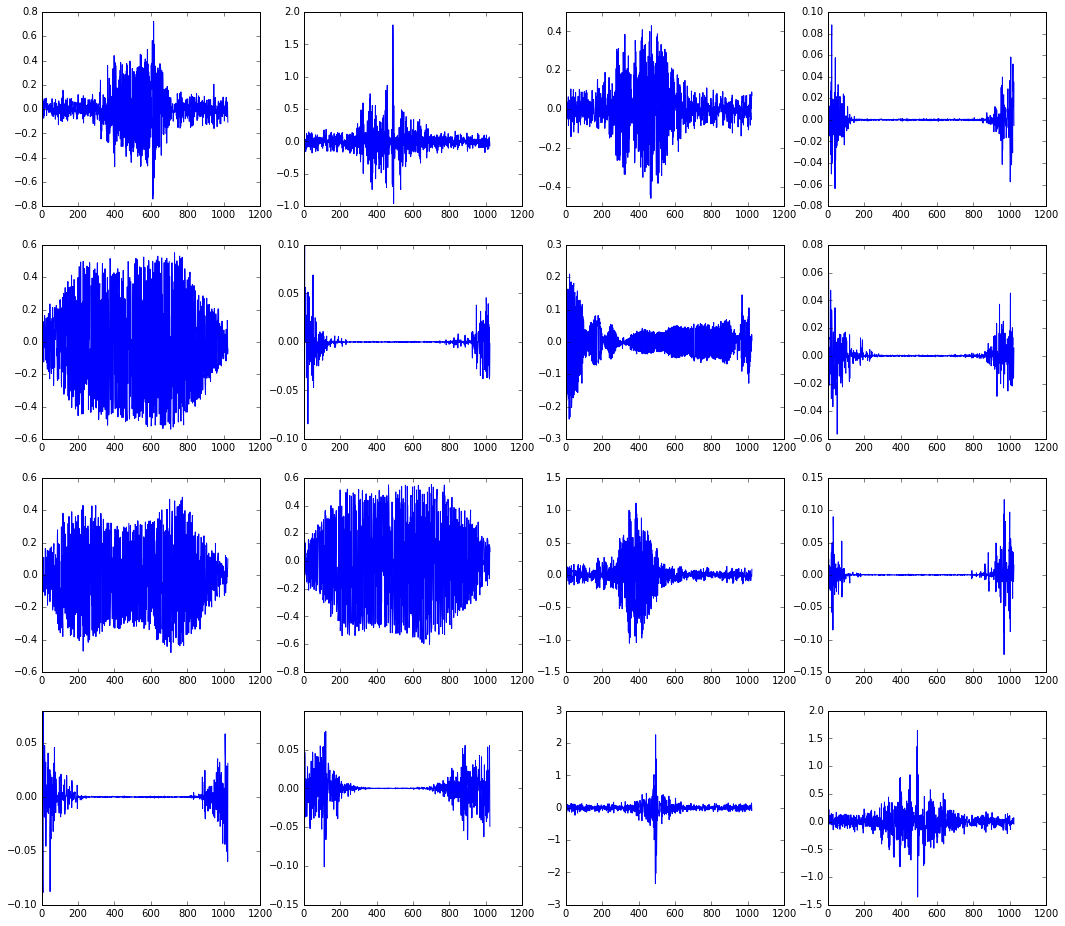

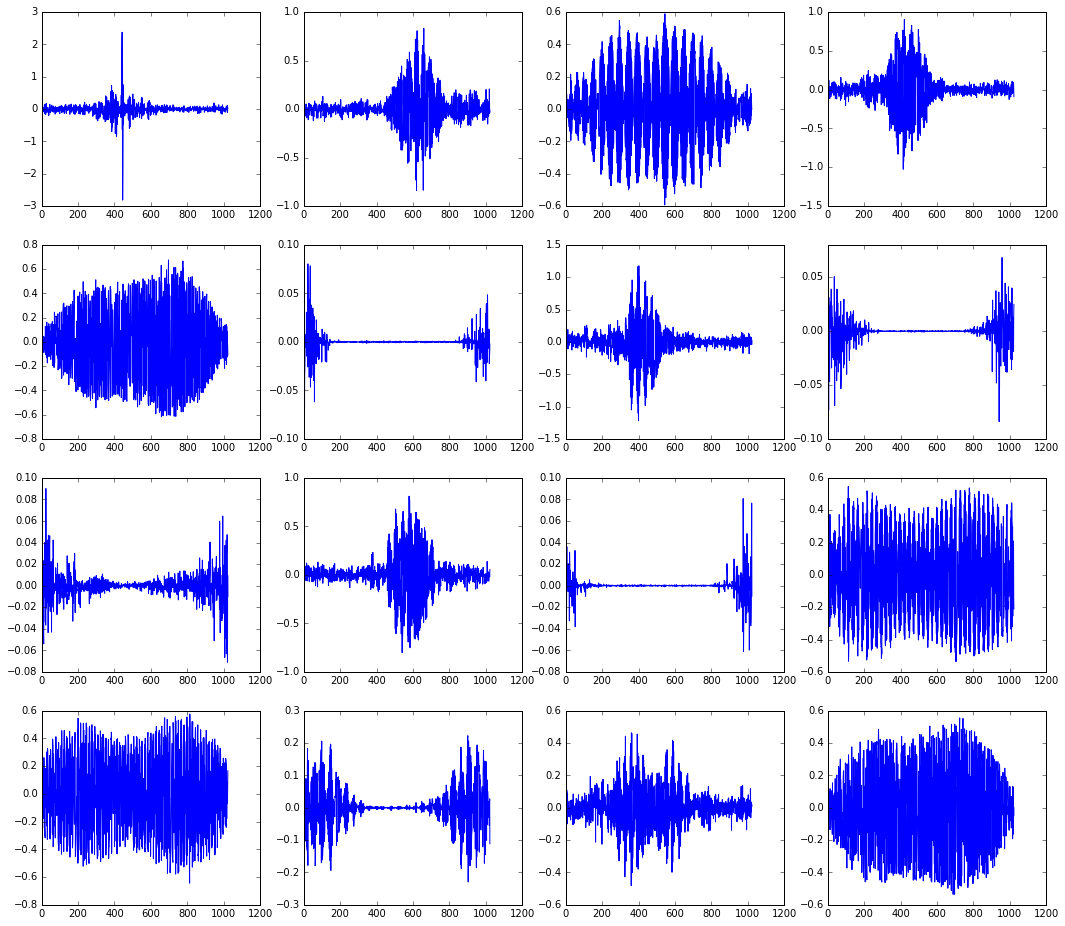

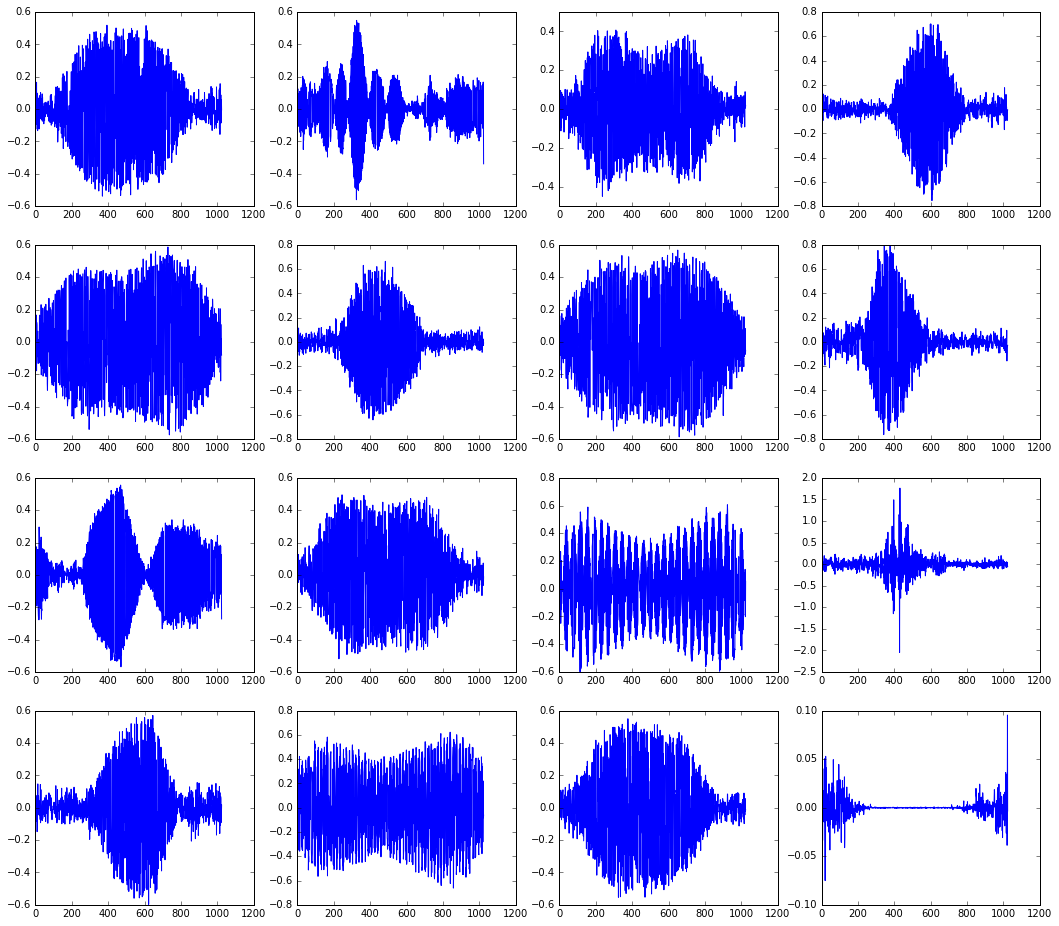

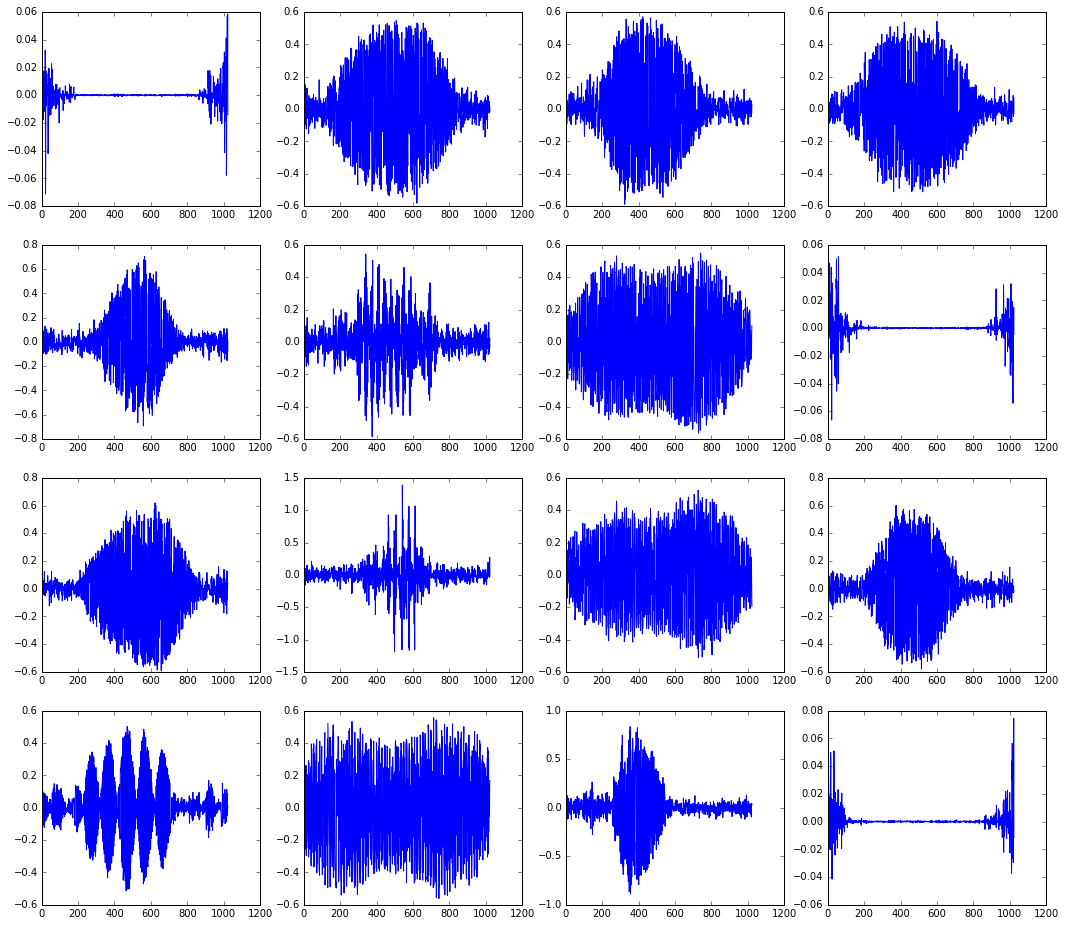

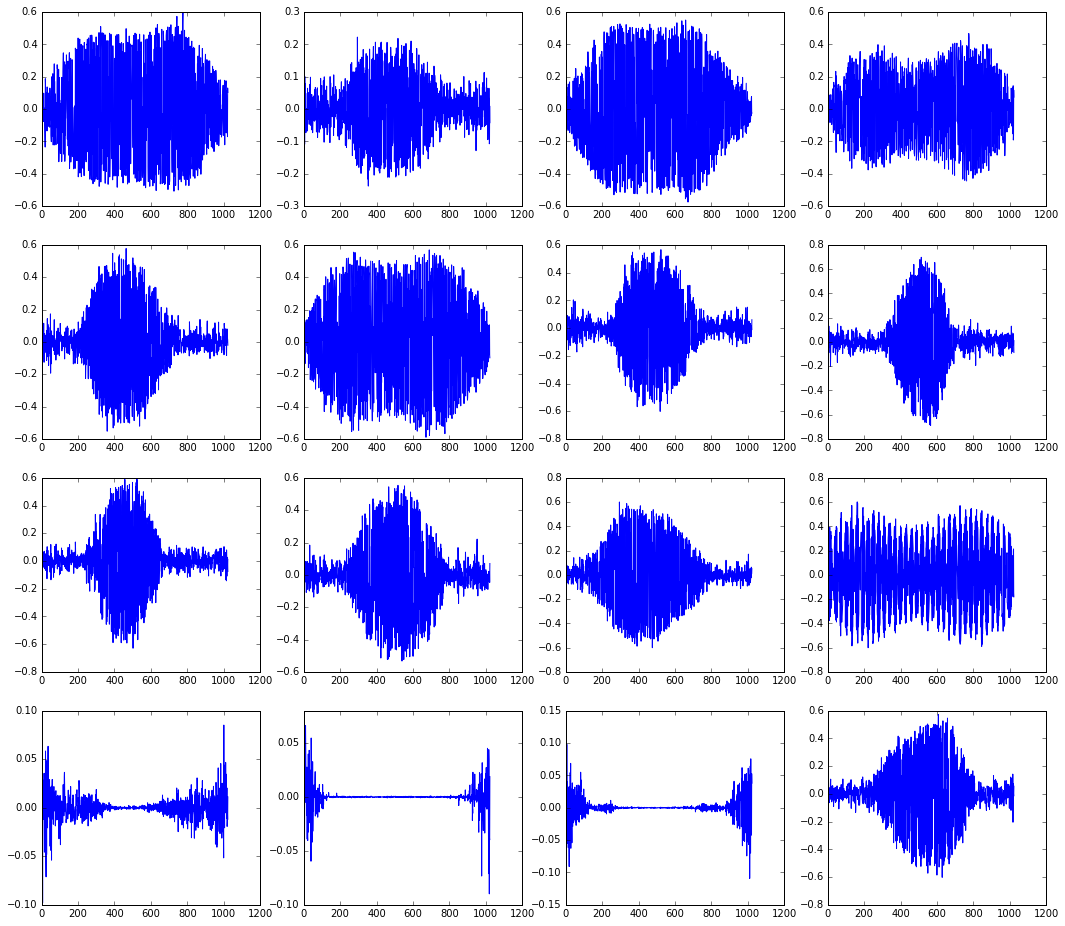

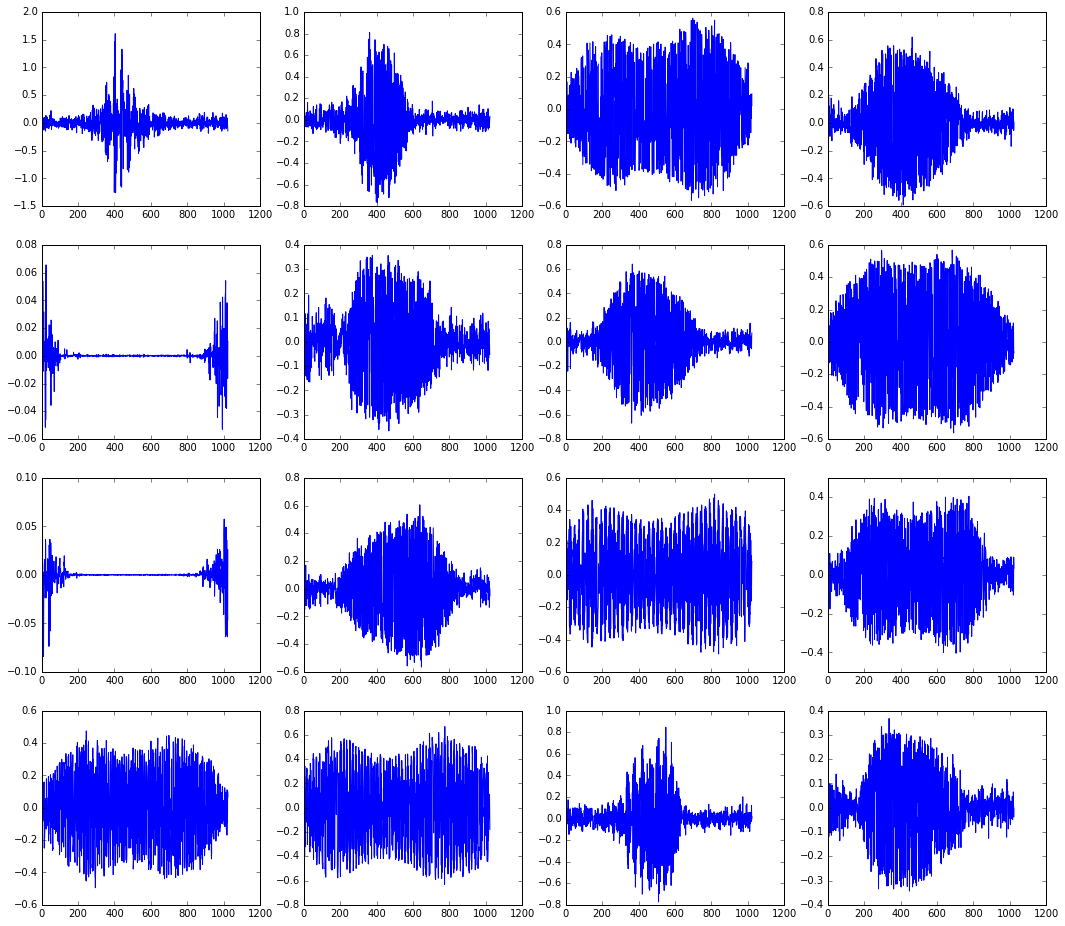

In [15]:

plt.plot(np.abs(window_back), label='front window')
plt.plot(np.abs(hanning), label='hanning window')
plt.plot(np.abs(hamming), label='hanning window')
plt.axis([0, 1024,-0.01,0.15])
plt.show()

print bases_front.shape

tot = 100

256

for j in range(16):
    fig, plots = plt.subplots(4, 4, figsize=(18, 16))
    for x in range(4):
        for y in range(4):
            plots[x, y].plot(bases_back[j*16+(4*y+x)])
    plt.show()
